In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wget
import matplotlib

In [2]:
df = pd.read_csv('data/dati_fle_2010_2019.csv', header=None, names=['Data', 'Magnitudo','Latitudine','Longitudine','Profondità'])
df.drop(0, inplace=True)
for col in ['Magnitudo', 'Latitudine', 'Longitudine']:
    df[col] = pd.to_numeric(df[col])
df['Time'] = pd.to_datetime(df.Data)


In [3]:
df

,Data,Magnitudo,Latitudine,Longitudine,Profondità,Time
1,2000/08/22 14:17:1.36,1.4,40.8258,14.1477,2.17,2000-08-22 14:17:01.360
2,2000/08/22 15:05:56.84,1.6,40.8267,14.1487,2.75,2000-08-22 15:05:56.840
3,2000/08/22 15:58:2.27,2.2,40.8278,14.1448,2.68,2000-08-22 15:58:02.270
4,2000/08/22 17:31:35.54,1.9,40.8370,14.1527,0.06,2000-08-22 17:31:35.540
5,2000/08/22 18:20:54.53,1.4,40.8255,14.1485,2.00,2000-08-22 18:20:54.530
...,...,...,...,...,...,...
1485,2019/12/18 03:50:29.44,-0.5,40.8243,14.1443,0.87,2019-12-18 03:50:29.440
1486,2019/12/20 00:20:11.07,-0.3,40.8262,14.1402,0.98,2019-12-20 00:20:11.070
1487,2019/12/24 02:18:22.32,1.3,40.8267,14.1452,1.44,2019-12-24 02:18:22.320
1488,2019/12/25 13:34:34.06,0.2,40.8228,14.1525,0.46,2019-12-25 13:34:34.060


In [4]:
df2 = pd.read_csv("data/Vertical-displacement-1.txt", delimiter = "\s+ ", engine = "python", names = ["date", "Distanza"])
df2.drop(0, inplace=True)

In [5]:
df2['Time'] = pd.to_datetime(df2.date)
df2

,date,Distanza,Time
1,5/29/2000,0.0000,2000-05-29
2,5/30/2000,0.0171,2000-05-30
3,5/31/2000,0.0093,2000-05-31
4,6/1/2000,0.0135,2000-06-01
5,6/2/2000,0.0182,2000-06-02
...,...,...,...
7049,6/26/2020,0.6526,2020-06-26
7050,6/27/2020,0.6484,2020-06-27
7051,6/28/2020,0.6512,2020-06-28
7052,6/29/2020,0.6419,2020-06-29


Grafico magnitudo vs data

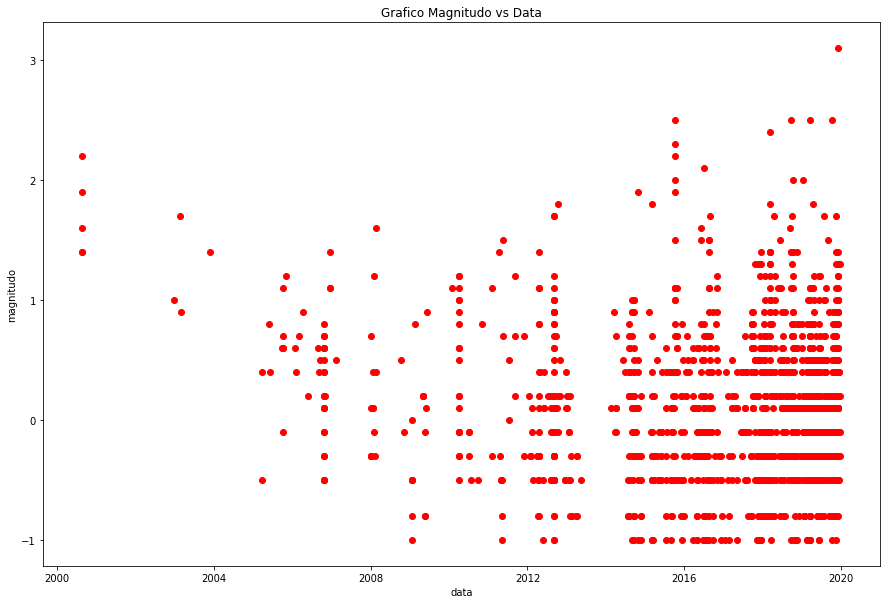

In [6]:
data = df["Time"]
mg = df["Magnitudo"]
plt.figure(figsize = (15,10))
plt.scatter(data, mg, color = "red")
plt.xlabel("data")
plt.ylabel("magnitudo")
plt.title("Grafico Magnitudo vs Data")
plt.show()

In [7]:
df.index = df["Time"]
cross_tab = pd.crosstab(index = df.index.year, columns = df.index.month)
cross_tab

col_0,1,2,3,4,5,6,7,8,9,10,11,12
row_0,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,5,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,0,1
2003,0,1,1,0,0,0,0,0,0,0,1,0
2005,0,0,2,0,1,1,0,0,1,5,1,0
2006,1,1,1,1,1,0,0,1,2,22,0,3
2007,0,1,0,0,0,0,0,0,0,0,0,0
2008,9,5,0,0,0,0,0,0,0,1,1,0
2009,6,1,0,0,7,1,0,0,0,0,0,0
2010,1,0,19,0,0,0,4,0,0,1,1,0


In [8]:
tri_1  = cross_tab.loc[:,0:3].sum(axis =1)
tri_2  = cross_tab.loc[:,3:6].sum(axis =1)
tri_3  = cross_tab.loc[:,6:9].sum(axis =1)
tri_4  = cross_tab.loc[:,9:12].sum(axis =1)



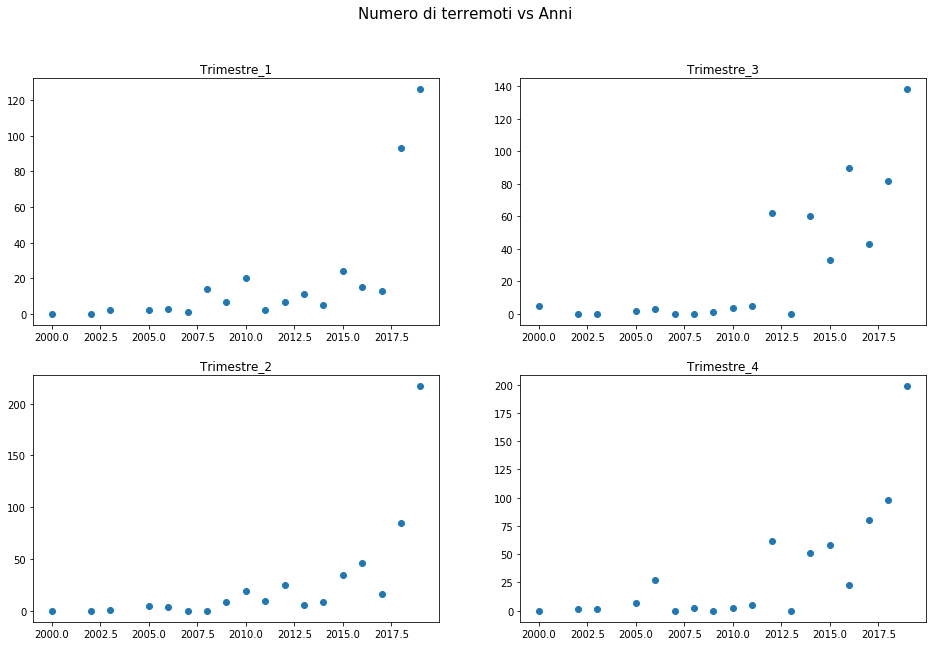

In [9]:
fig,ax  = plt.subplots(2,2,figsize = (16,10))
ax[0,0].scatter(cross_tab.index, tri_1)
ax[1,0].scatter(cross_tab.index, tri_2)
ax[0,1].scatter(cross_tab.index, tri_3)
ax[1,1].scatter(cross_tab.index, tri_4)
ax[0,0].set_title("Trimestre_1")
ax[1,0].set_title("Trimestre_2")
ax[0,1].set_title("Trimestre_3")
ax[1,1].set_title("Trimestre_4")
fig.suptitle('Numero di terremoti vs Anni', size = 15)
plt.show()

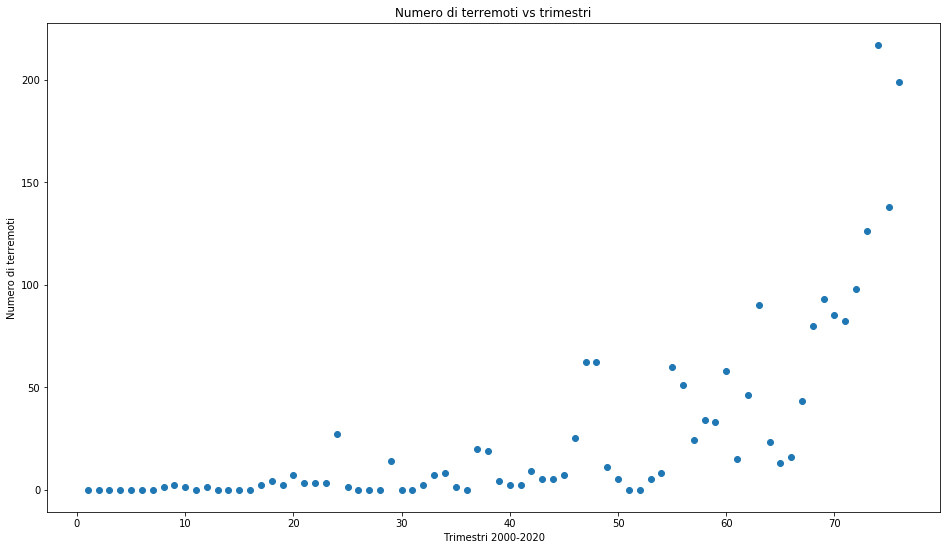

76


In [26]:
x1 =[]
y1 = []
contatore = 0
for i in range(2001,2020,1):
    if i in cross_tab.index:
        for j in[0,3,6,9]:
            tri_j  = cross_tab.loc[i,j:j+3].sum()
            contatore += 1
            y1.append(tri_j)
            x1.append(contatore)
    else:
        for j in[0,3,6,9]:
            tri_j  = 0
            contatore += 1
            y1.append(tri_j)
            x1.append(contatore)

        
plt.figure(figsize = (16,9))
plt.scatter(x1,y1)
plt.xlabel("Trimestri 2000-2020")
plt.ylabel("Numero di terremoti")
plt.title("Numero di terremoti vs trimestri")
plt.show()
print(len(y1))

In [27]:
df2.index = df2["Time"]
Month=[]
for i in range(1,13,1):
    y = df2[df2.index.month == i][["Distanza", "Time"]]
    y.index = y["Time"]
    Mean = []
    for j in np.arange(2002,2020,1):
        z =pd.to_numeric(y[y.index.year == j]["Distanza"])
        mean = z.mean()
        Mean.append(mean)
    Month.append(Mean)


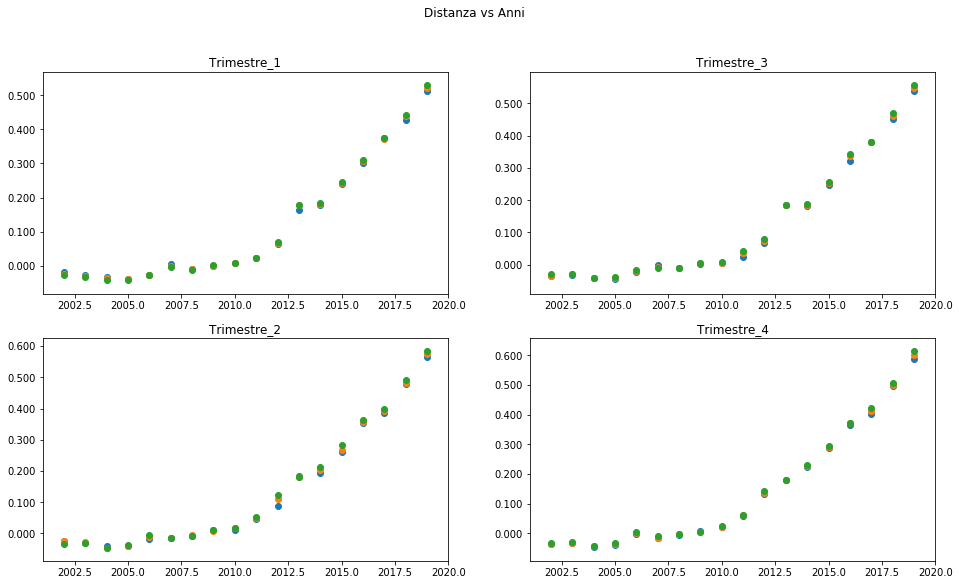

In [28]:
years = np.arange(2002,2020,1)
fig,ax  = plt.subplots(2,2,figsize = (16,9))

ax[0,0].scatter(years, Month[0])
ax[0,0].scatter(years, Month[1])
ax[0,0].scatter(years, Month[2])
ax[0,1].scatter(years, Month[3])
ax[0,1].scatter(years, Month[4])
ax[0,1].scatter(years, Month[5])
ax[1,0].scatter(years, Month[6])
ax[1,0].scatter(years, Month[7])
ax[1,0].scatter(years, Month[8])
ax[1,1].scatter(years, Month[9])
ax[1,1].scatter(years, Month[10])
ax[1,1].scatter(years, Month[11])
ax[0,0].set_title("Trimestre_1")
ax[1,0].set_title("Trimestre_2")
ax[0,1].set_title("Trimestre_3")
ax[1,1].set_title("Trimestre_4")
ax[0,0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
ax[0,1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
ax[1,0].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
ax[1,1].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
fig.suptitle('Distanza vs Anni')
plt.show()




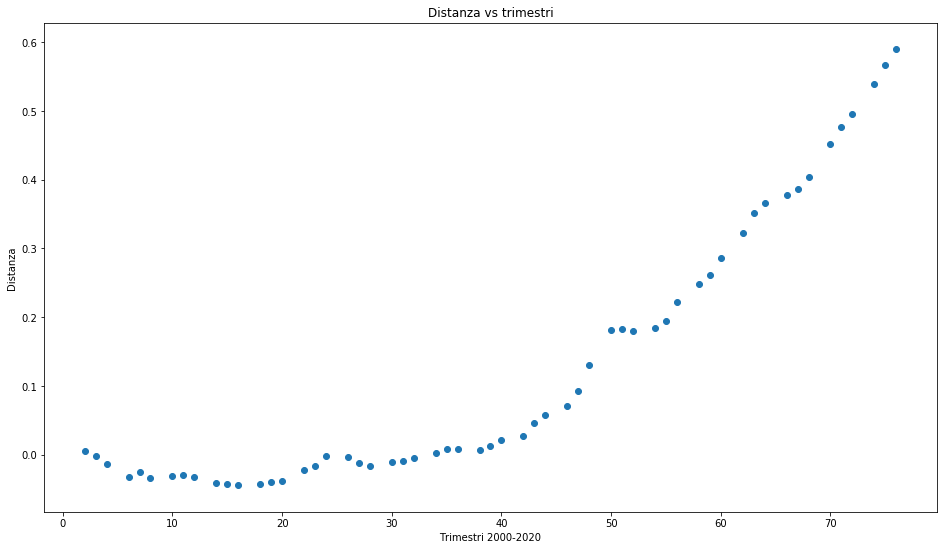

In [29]:
df2.index = df2["Time"]
x2 =[]
y2 =[]
contatore = 0

for j in np.arange(2001,2020,1):
    a = df2[df2.index.year == j][["Distanza", "Time"]]
    a.index = a["Time"]
    for i in [0,3,6,9]:
        z1=pd.to_numeric(a[a.index.month == i]["Distanza"])
        z2=pd.to_numeric(a[a.index.month == i+1]["Distanza"])
        z3=pd.to_numeric(a[a.index.month == i+2]["Distanza"])
        mean1 = z1.mean()
        mean2 = z2.mean()
        mean3 = z3.mean()
        mean = (mean1+mean2+mean3)/3
        contatore += 1
        y2.append(mean)
        x2.append(contatore)
    
plt.figure(figsize = (16,9))
plt.scatter(x2,y2)
plt.xlabel("Trimestri 2000-2020")
plt.ylabel("Distanza")
plt.title("Distanza vs trimestri")
plt.show()

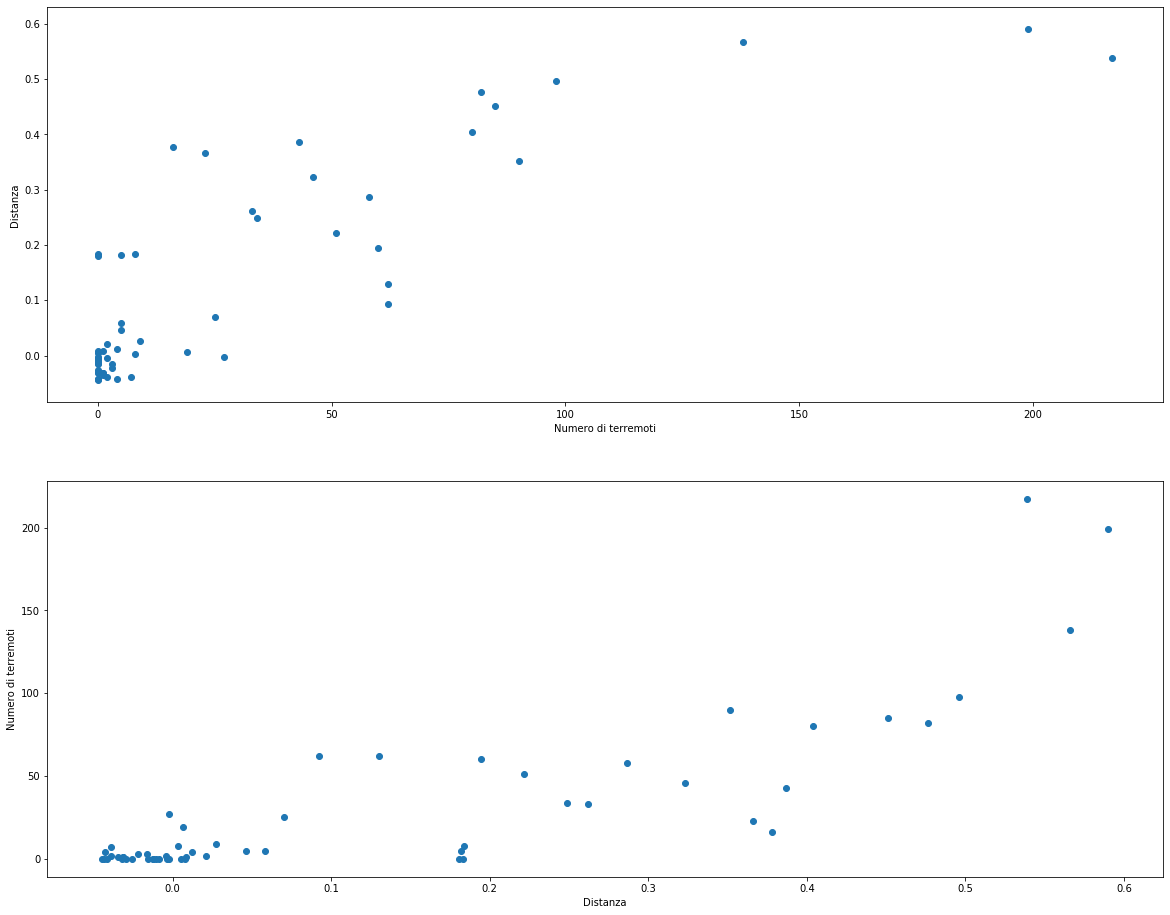

In [36]:
fig, ax = plt.subplots(2, figsize = (20,16))
ax[0].scatter(y1,y2)
ax[1].scatter(y2,y1)
ax[0].set_xlabel("Numero di terremoti")
ax[0].set_ylabel("Distanza")
ax[1].set_ylabel("Numero di terremoti")
ax[1].set_xlabel("Distanza")
plt.show()